# Xbee Table, Cleaning of Data

# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Reading WiSenseData

In [2]:
#Reading the Indoor dataset
dff = pd.read_csv('XbeeTable.csv' , header = None)  

In [3]:
#There are 9 columns
dff.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

# 3. Renaming the Columns

In [4]:
df = dff.rename(columns={0: 'datestamp', 1: 'nodeAddress' , 2: 'BME280_Temp', 3: 'BME280_Hum', 4: 'BME280_Pres', 5: 'DS18B20_Temp', 6: 'DHT_Temp', 7: 'DHT_Hum', 8: 'BATTERY_Vol'})

In [5]:
#Printing first five rows of dataset
df.head()

,datestamp,nodeAddress,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,DHT_Temp,DHT_Hum,BATTERY_Vol
0,2019-01-06 15:01:06,415d86f0,15.78,39.93,90424.59,40.10,0.0,0.0,0.0
1,2019-01-06 15:01:20,416c44e1,0.00,0.00,0.00,17.38,17.3,50.9,0.0
2,2019-01-06 15:01:27,416c44c2,0.00,0.00,0.00,13.13,13.5,51.0,0.0
3,2019-01-06 15:01:58,415d86f0,15.79,40.09,90432.17,40.09,0.0,0.0,0.0
4,2019-01-06 15:02:13,416c44e1,0.00,0.00,0.00,17.38,17.3,50.9,0.0


In [6]:
# Getting some info about Dataset
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416233 entries, 0 to 416232
Data columns (total 9 columns):
datestamp       416233 non-null object
nodeAddress     416233 non-null object
BME280_Temp     416233 non-null float64
BME280_Hum      416233 non-null float64
BME280_Pres     416233 non-null float64
DS18B20_Temp    416233 non-null float64
DHT_Temp        416233 non-null float64
DHT_Hum         416233 non-null float64
BATTERY_Vol     416233 non-null float64
dtypes: float64(7), object(2)
memory usage: 28.6+ MB


In [7]:
#Copying the original dataset ('df') into data1
data1 = df.copy() 

In [8]:
#Describing different features of DataSet
data1.describe() 

,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,DHT_Temp,DHT_Hum,BATTERY_Vol
count,416233.000000,416233.000000,416233.000000,416233.000000,4.162330e+05,416233.000000,416233.000000
mean,7.753284,13.895521,32214.479375,27.266711,1.033700e+18,25.486847,0.139007
std,10.890257,19.239385,42953.774773,9.578671,2.520638e+20,20.214414,0.936465
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,19.440000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000,25.060000,1.810000e+01,33.300000,0.000000
75%,19.230000,36.620000,89797.980000,36.060000,2.330000e+01,43.200000,0.000000
max,31.970000,88.260000,91247.980000,85.000000,6.146571e+22,58.200000,7.920000


In [9]:
#Getting total number of Unique Nodes from the DataSet
data1.groupby('nodeAddress').count() 

,datestamp,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,DHT_Temp,DHT_Hum,BATTERY_Vol
nodeAddress,,,,,,,,
41513957,4,4,4,4,4,4,4,4
4151395d,1,1,1,1,1,1,1,1
4151395f,2,2,2,2,2,2,2,2
415d86f0,140867,140867,140867,140867,140867,140867,140867,140867
415d8755,7129,7129,7129,7129,7129,7129,7129,7129
415d8759,2123,2123,2123,2123,2123,2123,2123,2123
416c44c2,165890,165890,165890,165890,165890,165890,165890,165890
416c44e1,100217,100217,100217,100217,100217,100217,100217,100217


In [10]:
#Converting datatype of 'timeStamp' to datetime type
data1['datestamp'] = pd.to_datetime(data1['datestamp'])  

In [11]:
#Now we can se the data type of 'timeStamp', it is now datetime type
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416233 entries, 0 to 416232
Data columns (total 9 columns):
datestamp       416233 non-null datetime64[ns]
nodeAddress     416233 non-null object
BME280_Temp     416233 non-null float64
BME280_Hum      416233 non-null float64
BME280_Pres     416233 non-null float64
DS18B20_Temp    416233 non-null float64
DHT_Temp        416233 non-null float64
DHT_Hum         416233 non-null float64
BATTERY_Vol     416233 non-null float64
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 28.6+ MB


# Functions to Clean the DataSet

In [12]:
# Now We will create new columns in our Dataset as below.
# These column will contain value '1' if corresponding values are changed changed else it will contain 0
data1['BME280_Temp_changed'] = 0
data1['BME280_Pres_changed'] = 0
data1['DS18B20_Temp_changed'] = 0
data1['DHT_Temp_changed'] = 0

In [13]:
# Grouping the DataSet by 'BME280_Temp_changed.
data1.groupby('BME280_Temp_changed').count()

,datestamp,nodeAddress,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,DHT_Temp,DHT_Hum,BATTERY_Vol,BME280_Pres_changed,DS18B20_Temp_changed,DHT_Temp_changed
BME280_Temp_changed,,,,,,,,,,,,
0,416233,416233,416233,416233,416233,416233,416233,416233,416233,416233,416233,416233


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416233 entries, 0 to 416232
Data columns (total 13 columns):
datestamp               416233 non-null datetime64[ns]
nodeAddress             416233 non-null object
BME280_Temp             416233 non-null float64
BME280_Hum              416233 non-null float64
BME280_Pres             416233 non-null float64
DS18B20_Temp            416233 non-null float64
DHT_Temp                416233 non-null float64
DHT_Hum                 416233 non-null float64
BATTERY_Vol             416233 non-null float64
BME280_Temp_changed     416233 non-null int64
BME280_Pres_changed     416233 non-null int64
DS18B20_Temp_changed    416233 non-null int64
DHT_Temp_changed        416233 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 41.3+ MB


# Following is the function to clean temperature and pressure

In [15]:
#Dealing with outliers

In [16]:
from tqdm import tqdm_notebook
nodes = data1['nodeAddress'].unique() # this line will create an array having total unique nodes


#Function to clean 'BME280_Temp'


def BME280_Temp_clean(df):
    for n in tqdm_notebook(nodes , desc = 'Processing records'):
    #for n in nodes:
        k = 0
        for i in range(k , df.shape[0]-1):
          if(df.loc[i, 'nodeAddress'] == n):
            val0 = float(df.loc[i,'BME280_Temp'])
            time0 = (df.loc[i,'datestamp' ])
            for j in range(i+1, df.shape[0]-1):
              if(df.loc[j, 'nodeAddress'] == n):
                val1 = float(df.loc[j , 'BME280_Temp'])
                time1 = (df.loc[j , 'datestamp'])
                timedelta = time1 - time0
                minutes = timedelta.total_seconds() / 60
                
                if (abs(val1 - val0) > 10 and minutes < 30.0):
                  df.loc[j,'BME280_Temp'] = val0
                  df.loc[j, 'BME280_Temp_changed'] = 1
                  k = j
                  break
                elif((val1) > 100  and minutes > 30.0):
                  df.loc[j,'BME280_Temp'] = 'NaN'
                  k = j
                  break
                
                elif((val1) < 0  and minutes > 30.0):
                  df.loc[j,'BME280_Temp'] = 'NaN'
                  k = j
                  break
                else:
                  k = j
                  break
                    
                 
                
                
# Function to clean 'BME280_Pres'

def BME280_Pres_clean(df):
    for n in tqdm_notebook(nodes , desc = 'Processing records'):
    #for n in nodes:
        k = 0
        for i in range(k , df.shape[0]-1):
          if(df.loc[i, 'nodeAddress'] == n):
            val0 = float(df.loc[i,'BME280_Pres'])
            time0 = (df.loc[i,'datestamp' ])
            for j in range(i+1, df.shape[0]-1):
              if(df.loc[j, 'nodeAddress'] == n):
                val1 = float(df.loc[j , 'BME280_Pres'])
                time1 = (df.loc[j , 'datestamp'])
                timedelta = time1 - time0
                minutes = timedelta.total_seconds() / 60
                
                if (abs(val1 - val0) > 10 and minutes < 30.0):
                  df.loc[j,'BME280_Pres'] = val0
                  df.loc[j, 'BME280_Pres_changed'] = 1
                  k = j
                  break
                elif(((val1) > 100000 or (val1) < 75000 ) and minutes > 30.0):
                  df.loc[j,'BME280_Pres'] = 'NaN'
                  k = j
                  break
                else:
                  k = j
                  break                
                

            
            
            

#Function to clean 'DS18B20_Temp'


def DS18B20_Temp_clean(df):
    for n in tqdm_notebook(nodes , desc = 'Processing records'):
    #for n in nodes:
        k = 0
        for i in range(k , df.shape[0]-1):
          if(df.loc[i, 'nodeAddress'] == n):
            val0 = float(df.loc[i,'DS18B20_Temp'])
            time0 = (df.loc[i,'datestamp' ])
            for j in range(i+1, df.shape[0]-1):
              if(df.loc[j, 'nodeAddress'] == n):
                val1 = float(df.loc[j , 'DS18B20_Temp'])
                time1 = (df.loc[j , 'datestamp'])
                timedelta = time1 - time0
                minutes = timedelta.total_seconds() / 60
                
                if (abs(val1 - val0) > 10 and minutes < 30.0):
                  df.loc[j,'DS18B20_Temp'] = val0
                  df.loc[j, 'DS18B20_Temp_changed'] = 1
                  k = j
                  break
                elif((val1) > 60  and minutes > 30.0):
                  df.loc[j,'DS18B20_Temp'] = data1['DS18B20_Temp'].mean()
                  k = j
                  break
                
                elif((val1) < 0  and minutes > 30.0):
                  df.loc[j,'DS18B20_Temp'] = 'NaN'
                  k = j
                  break
                else:
                  k = j
                  break
                    
                                 
                        
                        
                        
#Function to clean 'DHT_Temp'


def DHT_Temp_clean(df):
    for n in tqdm_notebook(nodes , desc = 'Processing records'):
    #for n in nodes:
        k = 0
        for i in range(k , df.shape[0]-1):
          if(df.loc[i, 'nodeAddress'] == n):
            val0 = float(df.loc[i,'DHT_Temp'])
            time0 = (df.loc[i,'datestamp' ])
            for j in range(i+1, df.shape[0]-1):
              if(df.loc[j, 'nodeAddress'] == n):
                val1 = float(df.loc[j , 'DHT_Temp'])
                time1 = (df.loc[j , 'datestamp'])
                timedelta = time1 - time0
                minutes = timedelta.total_seconds() / 60
                
                if (abs(val1 - val0) > 10 and minutes < 30.0):
                  df.loc[j,'DHT_Temp'] = val0
                  df.loc[j, 'DHT_Temp_changed'] = 1
                  k = j
                  break
                elif((val1) > 100  and minutes > 30.0):
                  df.loc[j,'DHT_Temp'] = 'NaN'
                  k = j
                  break
                
                elif((val1) < 0  and minutes > 30.0):
                  df.loc[j,'DHT_Temp'] = 'NaN'
                  k = j
                  break
                else:
                  k = j
                  break
                                            

In [17]:
print('Cleaning BME280_Temp')
BME280_Temp_clean(data1)

print('Cleaning BME280_Pres')
BME280_Pres_clean(data1)

print('Cleaning DS18B20_Temp')
DS18B20_Temp_clean(data1)

print('Cleaning DTH_Temp')
DHT_Temp_clean(data1)

Cleaning BME280_Temp



Cleaning BME280_Pres



Cleaning DS18B20_Temp



Cleaning DTH_Temp


In [20]:
data1['DS18B20_Temp'] = data1['DS18B20_Temp'].astype(float) 
data1['BME280_Pres'] = data1['BME280_Pres'].astype(float) 
data1['DHT_Temp'] = data1['DHT_Temp'].astype(float) 

data1.describe()

,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,DHT_Temp,DHT_Hum,BATTERY_Vol,BME280_Temp_changed,BME280_Pres_changed,DS18B20_Temp_changed,DHT_Temp_changed
count,416233.000000,416233.000000,416115.000000,416233.000000,4.162320e+05,416233.000000,416233.000000,416233.0,416233.000000,416233.000000,416233.000000
mean,7.753284,13.895521,32270.550544,26.864076,8.860305e+17,25.486847,0.139007,0.0,0.285535,0.023287,0.023285
std,10.890257,19.239385,43016.260934,10.305300,2.333663e+20,20.214414,0.936465,0.0,0.451669,0.150815,0.150807
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,19.380000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,25.000000,1.790000e+01,33.300000,0.000000,0.0,0.000000,0.000000,0.000000
75%,19.230000,36.620000,89720.890000,36.060000,2.330000e+01,43.200000,0.000000,0.0,1.000000,0.000000,0.000000
max,31.970000,88.260000,91031.500000,50.950000,6.146571e+22,58.200000,7.920000,0.0,1.000000,1.000000,1.000000


In [25]:
data1['DS18B20_Temp'].mean()

28.026743426755633

In [45]:
data1.to_csv('kaish.csv', index = None)

In [21]:
df.describescribe()

,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,DHT_Temp,DHT_Hum,BATTERY_Vol
count,416233.000000,416233.000000,416233.000000,416233.000000,4.162330e+05,416233.000000,416233.000000
mean,7.753284,13.895521,32214.479375,27.266711,1.033700e+18,25.486847,0.139007
std,10.890257,19.239385,42953.774773,9.578671,2.520638e+20,20.214414,0.936465
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,19.440000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000,25.060000,1.810000e+01,33.300000,0.000000
75%,19.230000,36.620000,89797.980000,36.060000,2.330000e+01,43.200000,0.000000
max,31.970000,88.260000,91247.980000,85.000000,6.146571e+22,58.200000,7.920000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416233 entries, 0 to 416232
Data columns (total 9 columns):
datestamp       416233 non-null object
nodeAddress     416233 non-null object
BME280_Temp     416233 non-null float64
BME280_Hum      416233 non-null float64
BME280_Pres     416233 non-null float64
DS18B20_Temp    416233 non-null float64
DHT_Temp        416233 non-null float64
DHT_Hum         416233 non-null float64
BATTERY_Vol     416233 non-null float64
dtypes: float64(7), object(2)
memory usage: 28.6+ MB


# Plotting Graphs

/home/kaish114/.local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/kaish114/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


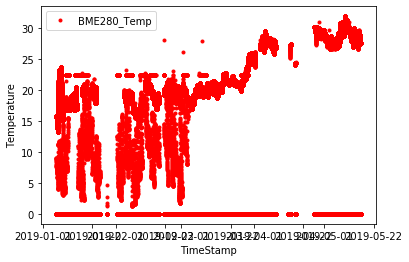

In [23]:
df['datestamp'] = pd.to_datetime(df['datestamp'])
plt.plot(df.datestamp,df.BME280_Temp , '.r', label='BME280_Temp')
#plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
#plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)


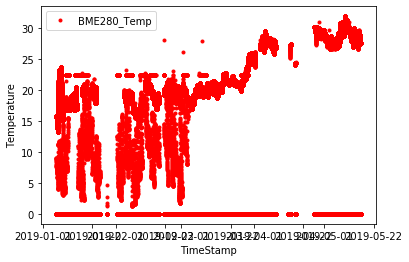

In [24]:
df['datestamp'] = pd.to_datetime(df['datestamp'])
plt.plot(data1.datestamp,data1.BME280_Temp , '.r', label='BME280_Temp')
#plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
#plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)


In [25]:
df.head()

,datestamp,nodeAddress,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,DHT_Temp,DHT_Hum,BATTERY_Vol
0,2019-01-06 15:01:06,415d86f0,15.78,39.93,90424.59,40.10,0.0,0.0,0.0
1,2019-01-06 15:01:20,416c44e1,0.00,0.00,0.00,17.38,17.3,50.9,0.0
2,2019-01-06 15:01:27,416c44c2,0.00,0.00,0.00,13.13,13.5,51.0,0.0
3,2019-01-06 15:01:58,415d86f0,15.79,40.09,90432.17,40.09,0.0,0.0,0.0
4,2019-01-06 15:02:13,416c44e1,0.00,0.00,0.00,17.38,17.3,50.9,0.0


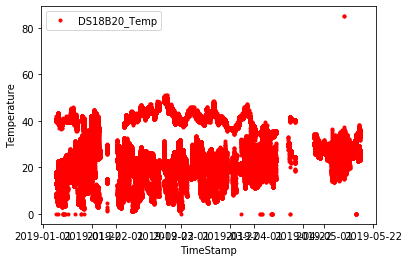

In [26]:
df['datestamp'] = pd.to_datetime(df['datestamp'])
plt.plot(df.datestamp,df.DS18B20_Temp , '.r', label='DS18B20_Temp')
#plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
#plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)


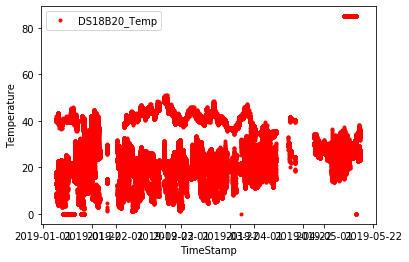

In [27]:
df['datestamp'] = pd.to_datetime(df['datestamp'])
plt.plot(data1.datestamp,data1.DS18B20_Temp , '.r', label='DS18B20_Temp')
#plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
#plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)


In [21]:
(np.array(np.where(data1.DS18B20_Temp > 60)))

array([[385239, 385249, 385250, ..., 411115, 411119, 411122]])

In [22]:
(np.array(np.where(df.DS18B20_Temp > 60)))

array([[385238, 385239]])

In [36]:
df[385235:385245]

,datestamp,nodeAddress,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,DHT_Temp,DHT_Hum,BATTERY_Vol
385235,2019-05-09 12:14:50,415d86f0,30.10,20.95,89391.02,20.87,0.0,0.0,0.0
385236,2019-05-09 12:15:25,416c44c2,0.00,0.00,0.00,28.25,28.8,19.1,0.0
385237,2019-05-09 12:15:42,415d86f0,30.12,20.80,89377.55,20.81,0.0,0.0,0.0
385238,2019-05-09 12:16:12,416c44e1,0.00,0.00,0.00,85.00,29.1,23.4,0.0
385239,2019-05-09 12:16:13,416c44e1,0.00,0.00,0.00,85.00,29.1,23.4,0.0
385240,2019-05-09 12:16:17,416c44c2,0.00,0.00,0.00,28.31,28.8,19.0,0.0
385241,2019-05-09 12:16:33,415d86f0,30.12,20.79,89383.00,20.77,0.0,0.0,0.0
385242,2019-05-09 12:17:09,416c44c2,0.00,0.00,0.00,28.31,28.9,18.7,0.0
385243,2019-05-09 12:17:24,415d86f0,30.14,20.97,89385.25,20.80,0.0,0.0,0.0
385244,2019-05-09 12:18:01,416c44c2,0.00,0.00,0.00,28.31,28.9,18.7,0.0
